# Today's date - 19 June 2023
# Topic - Dropout Layers

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [29]:
X_train = np.linspace(-1, 1, 20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [30]:
X_test = np.linspace(-1, 1, 20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

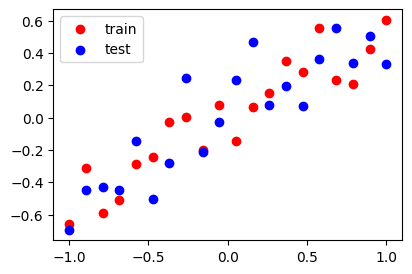

In [31]:
plt.figure(figsize=(4.5,3))
plt.scatter(X_train,y_train, c='red', label='train')
plt.scatter(X_test,y_test, c='blue', label='test')
plt.legend()
plt.show()

# Showing the with more epochs in this data will overfit

In [32]:
model = Sequential()
model.add(Dense(128,input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)

In [33]:
_,train_mse = model.evaluate(X_train, y_train, verbose=1)
_,test_mse = model.evaluate(X_test, y_test, verbose=1)
print("Train - {}, Test - {}".format(train_mse, test_mse))

1/1 [==============================] - 0s 32ms/step - loss: 0.0466 - mse: 0.0466
Train - 0.004584296140819788, Test - 0.046598512679338455


In [34]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 66ms/step


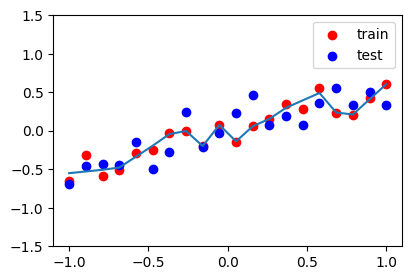

In [35]:
plt.figure(figsize=(4.5,3))
plt.scatter(X_train, y_train, c='red', label='train')
plt.scatter(X_test, y_test, c='blue', label='test')
plt.plot(X_train, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

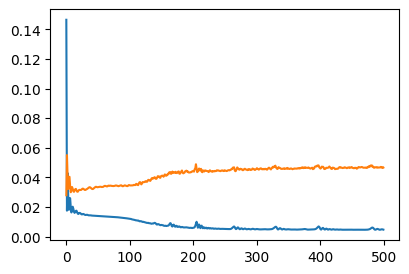

In [36]:
plt.figure(figsize=(4.5,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

###Clearly you can overfitting by both the graphs

# Now lets use Dropout layers to overcome overfitting


In [37]:
model = Sequential()
model.add(Dense(128,input_dim=1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)

In [38]:
_,train_mse = model.evaluate(X_train, y_train, verbose=1)
_,test_mse = model.evaluate(X_test, y_test, verbose=1)
print("Train - {}, Test - {}".format(train_mse, test_mse))

1/1 [==============================] - 0s 74ms/step - loss: 0.0393 - mse: 0.0393
Train - 0.012234630063176155, Test - 0.03928615525364876


In [39]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 78ms/step


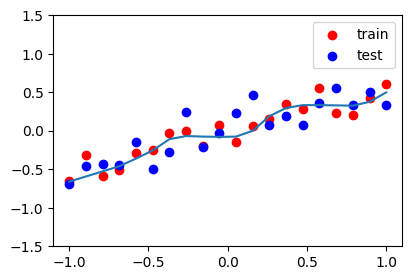

In [40]:
plt.figure(figsize=(4.5,3))
plt.scatter(X_train, y_train, c='red', label='train')
plt.scatter(X_test, y_test, c='blue', label='test')
plt.plot(X_train, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

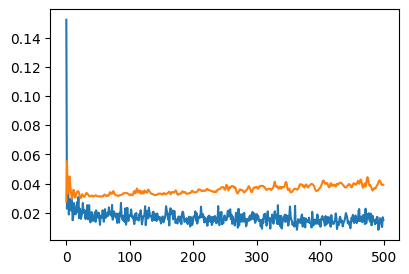

In [41]:
plt.figure(figsize=(4.5,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# clearly overfitting has reduced

lets make the dropout layer from 0.2 to 0.5

In [42]:
model = Sequential()
model.add(Dense(128,input_dim=1, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)

In [43]:
_,train_mse = model.evaluate(X_train, y_train, verbose=1)
_,test_mse = model.evaluate(X_test, y_test, verbose=1)
print("Train - {}, Test - {}".format(train_mse, test_mse))

1/1 [==============================] - 0s 47ms/step - loss: 0.0361 - mse: 0.0361
Train - 0.01618337258696556, Test - 0.036064110696315765


In [44]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 131ms/step


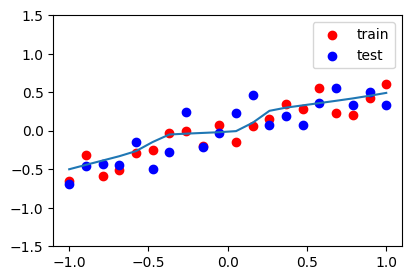

In [45]:
plt.figure(figsize=(4.5,3))
plt.scatter(X_train, y_train, c='red', label='train')
plt.scatter(X_test, y_test, c='blue', label='test')
plt.plot(X_train, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

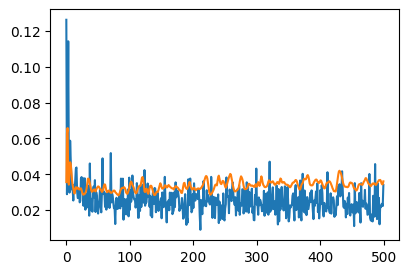

In [46]:
plt.figure(figsize=(4.5,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

at dropout 0.5, the graph plotted is like this